In [35]:
from fastai.vision import *
from fastai.widgets import *

In [55]:
folders = ['gold', 'pyrite']
files = ['goldmineral.txt', 'goldpyrite.txt'] 

path = None
dest = None
#making directories and downloading pics to each directory
for folder, file in zip(folders, files):
    path = Path('data/minerals')
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest, max_pics=200)

Error https://w.fabreminerals.com/specimens/s_imagesAG8/Gold-TM88AG8_9296_fm.jpg HTTPSConnectionPool(host='w.fabreminerals.com', port=443): Max retries exceeded with url: /specimens/s_imagesAG8/Gold-TM88AG8_9296_fm.jpg (Caused by SSLError(CertificateError("hostname 'w.fabreminerals.com' doesn't match either of 'secure.fabreminerals.com', 'www.secure.fabreminerals.com'",),))
Error https://www.icmj.com/userfiles/images/201104/34-Australia-gold-nugget.jpg HTTPSConnectionPool(host='www.icmj.com', port=443): Max retries exceeded with url: /userfiles/images/201104/34-Australia-gold-nugget.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))
Error https://www.minerals.net/thumbnail.aspx?image=MineralImages/gold-placer-nugget-american-river-ca-jerry-rosenthal.jpg&size=500 HTTPSConnectionPool(host='www.minerals.net', port=443): Read timed out. (read timeout=4)


Error http://www.icmj.com/userfiles/images/201602/23-quartz.jpg HTTPSConnectionPool(host='www.icmj.com', port=443): Max retries exceeded with url: /userfiles/images/201602/23-quartz.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))
Error https://www.icmj.com/userfiles/images/201709/26-hard-rock-gold-ores-pyrite.jpg HTTPSConnectionPool(host='www.icmj.com', port=443): Max retries exceeded with url: /userfiles/images/201709/26-hard-rock-gold-ores-pyrite.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))


In [56]:
path.ls()

[PosixPath('data/minerals/cleaned.csv'),
 PosixPath('data/minerals/gold'),
 PosixPath('data/minerals/.ipynb_checkpoints'),
 PosixPath('data/minerals/export.pkl'),
 PosixPath('data/minerals/goldpyrite.txt'),
 PosixPath('data/minerals/pyrite'),
 PosixPath('data/minerals/goldmineral.txt'),
 PosixPath('data/minerals/models')]

In [12]:
classes = ['gold', 'pyrite']
for c in classes: 
    print(c)
    verify_images(path/c, delete=True, max_size=500)

gold


cannot identify image file <_io.BufferedReader name='data/minerals/gold/00000138.png'>
Image data/minerals/gold/00000097.png has 4 instead of 3 channels
Image data/minerals/gold/00000036.png has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/minerals/gold/00000058.jpg'>
cannot identify image file <_io.BufferedReader name='data/minerals/gold/00000103.jpg'>
cannot identify image file <_io.BufferedReader name='data/minerals/gold/00000066.jpg'>
Image data/minerals/gold/00000113.png has 1 instead of 3 channels
pyrite


cannot identify image file <_io.BufferedReader name='data/minerals/pyrite/00000145.jpg'>
Image data/minerals/pyrite/00000034.gif has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/minerals/pyrite/00000015.png'>
cannot identify image file <_io.BufferedReader name='data/minerals/pyrite/00000125.jpg'>
Image data/minerals/pyrite/00000163.png has 4 instead of 3 channels


In [18]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

data.classes

['gold', 'pyrite']

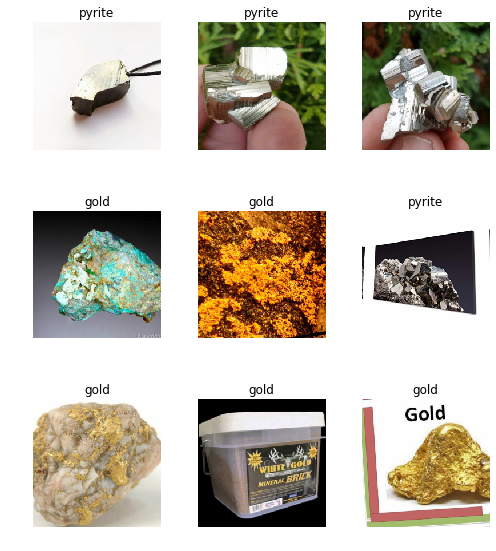

In [19]:
data.show_batch(rows=3, figsize=(7,8))

In [16]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 64859618.89it/s]


In [17]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.886261,0.667053,0.302632
2,0.685159,0.661179,0.276316
3,0.585130,0.457626,0.197368
4,0.505898,0.423946,0.157895


In [20]:
learn.save('stage-1')

In [21]:
learn.unfreeze()

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


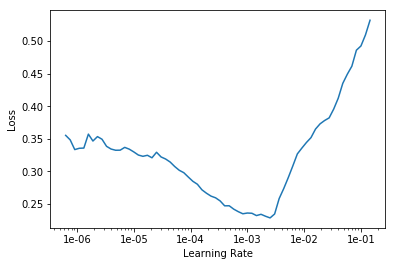

In [27]:
learn.recorder.plot()

In [29]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-3))

epoch,train_loss,valid_loss,error_rate
1,0.365932,0.462127,0.144737
2,0.305591,0.420739,0.144737


In [30]:
learn.save('stage-2')

In [31]:
learn.load('stage-2');

In [32]:
interp = ClassificationInterpretation.from_learner(learn)

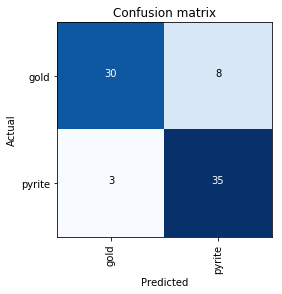

In [33]:
interp.plot_confusion_matrix()

In [36]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [37]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [38]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)

Getting activations...


Computing similarities...


In [39]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [49]:
df_train = pd.read_csv(path)
data = ImageDataBunch.from_df(path, df_train, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

You can deactivate this warning by passing `no_check=True`.


/opt/conda/envs/fastai/lib/python3.6/site-packages/fastai/basic_data.py:226: UserWarning: There seems to be something wrong with your dataset, can't access any element of self.train_ds.
Tried: 71,208,25,57,10...
  warn(warn_msg)


In [51]:
learn.export()

In [52]:
defaults.device = torch.device('cpu')

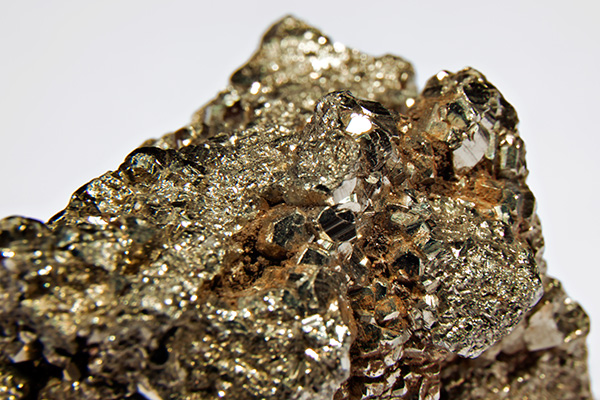

In [59]:
img = open_image(path/'pyrite'/'00000018.jpg')
img

In [60]:
learn = load_learner(path)

In [61]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class

Category pyrite